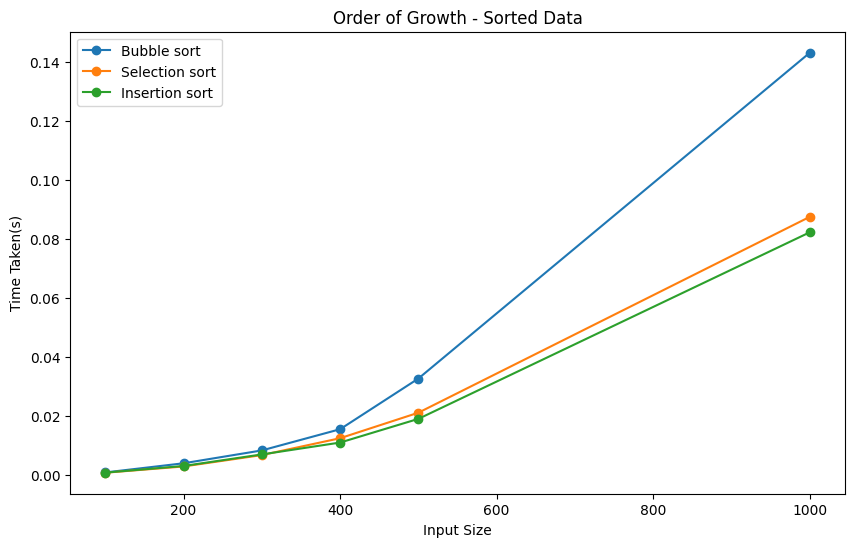

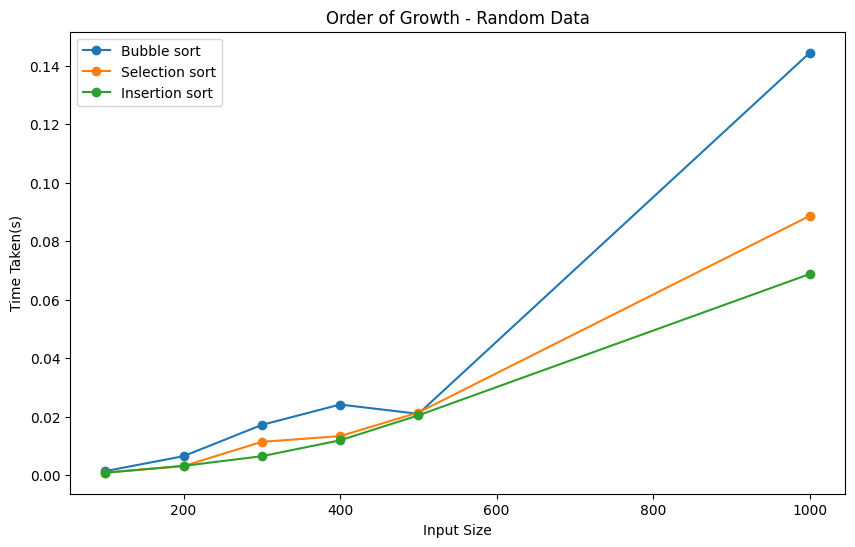

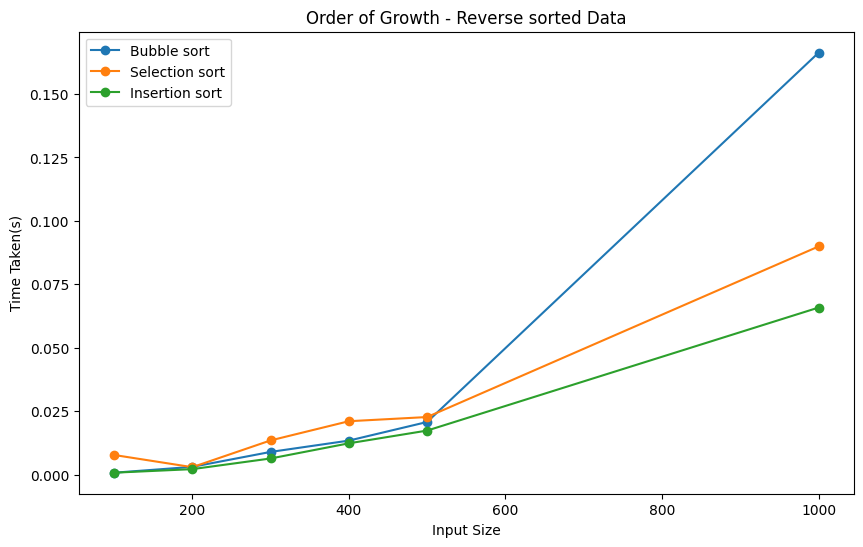

In [1]:
import time
import random
import matplotlib.pyplot as plt

#bubble sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

#selection sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

#insertion sort
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

#Generate the array for size and different order
def generate_array(size, order):
    if order == 'Sorted Data':
        return list(range(1, size + 1))
    elif order == 'Reverse Sorted Data':
        return list(range(size, 0, -1))
    else:
        return random.sample(range(1, size + 1), size)

def plot_results(algorithms, sizes, results, order):
    plt.figure(figsize=(10, 6))

    for algorithm in algorithms:
        plt.plot(sizes, results[algorithm.__name__], marker='o',label=f'{algorithm.__name__.replace("_", " ").capitalize()}')

    plt.title(f'Order of Growth - {order.capitalize()} Data')
    plt.xlabel('Input Size')
    plt.ylabel('Time Taken(s)')
    plt.legend()
    plt.show()

def run_algorithm(algorithm, sizes, order):
    results = []

    for size in sizes:
        arr = generate_array(size, order)

        start_time = time.time()
        algorithm(arr.copy())
        results.append(time.time() - start_time)

    return results

# Sizes of arrays
sizes = [100, 200, 300, 400, 500, 1000]

# Sorting Algorithms
algorithms = [bubble_sort, selection_sort, insertion_sort]

# Generate plots for each order
for order in ['Sorted','Random','Reverse Sorted']:
    results = {algorithm.__name__: run_algorithm(algorithm, sizes, order) for algorithm in algorithms}
    plot_results(algorithms, sizes, results, order)
